# Zadanie projektu

V tejto fáze sa od Vás očakáva:

**Základný opis dát spolu s ich charakteristikami (5b).**

Pre dosiahnutie plného počtu bodov uveďte

- počet záznamov,
- počet atribútov,
- ich typy,
- pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.

**Párová analýza dát (5b).**

- Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
- Identifikujte závislostí medzi dvojicami atribútov (napr. korelácie) a na závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).

**Formulácia a štatistické overenie hypotéz o dátach (2b).**

- Mali by ste sformulovať aspoň dve hypotézy o dátach, ktoré budú relevantné v kontexte zadanej predikčnej úlohy. Príkladom hypotézy v doméne (v závislosti od pridelenej dátovej sady) môže byť, napr. *pacienti s chorobou štítnej žľazy majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti bez danej choroby*.
- Vami sformulované hypotézy overte vhodne zvoleným štatistickým testom.

**Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze (4b).**

Identifikujte, čo a ako budete musieť v rámci predspracovania vyriešiť v ďalšej fáze, napr.:

- nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
- duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
- nejednotné formáty dát
- chýbajúce hodnoty
- vychýlené (odľahlé) hodnoty
- v dátach sa môžu nachádzať aj iné, tu nevymenované problémy.

**V odovzdanej správe (`Jupyter Notebooku`) by ste tak mali vedieť zodpovedať na otázky**

- Majú dáta vhodný formát pre ďalšie spracovanie? Ak nie, aké problémy sa v nich vyskytujú?
- Sú niektoré atribúty medzi sebou závislé? Od ktorých (jednotlivých) atribútov závisí predikovaná premenná?
- Sú v dátach chýbajúce hodnoty? Ako sú reprezentované? Ako plánujete riešiť problém chýbajúcich hodnôt pre jednotlivé atribúty, resp. pozorovania? (Pre rôzne atribúty môže byť vhodné použiť rôzne stratégie.)
- Nadobúdajú niektoré atribúty nezmyselné (nekonzistentné) či inak výrazne odchýlené hodnoty? Ktoré?
- Ako plánujete v ďalšej fáze tieto identifikované problémy adresovať / riešiť?

> Správa sa odovzdáva v 6. týždni semestra na cvičení. Dvojica svojmu cvičiacemu odprezentuje vykonanú prieskumnú analýzu v Jupyter Notebooku). Následne správu elektronicky odovzdá jeden člen z dvojice do systému AIS do nedele 01.11.2020 23:59.

In [24]:
import matplotlib.pyplot as plt
import pylab as py
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing
from numpy.random import seed
from numpy.random import rand
from numpy.random import randn
from numpy import mean
from numpy import var
from math import sqrt
import re
import json

In [25]:
personal_data = pd.read_csv("Dataset/personal_train.csv")
other_data = pd.read_csv("Dataset/other_train.csv")

## Základné informácie o datasetoch
Dataset personal_data:
* Veľkosť: 3933 záznamov
* Počet stĺpcov: 6
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())
* **Tento dataset néma žiadne duplicitné či chýbajúce dáta**
* Dôležité štatistické atribúty:
*    * Vek(age)
*    * Pohlavie(sex)

Vlastnosti štatistických atribútov uvedené nižšie (získané pomocou dataset\['atribute'\].describe())

Dataset personal_data:
* Veľkosť: 3983 záznamov
* Počet stĺpcov: 23
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())
* **Tento dataset obsahuje značné množstvo duplicitných či chýbajúcich dát**
* Dôležité štatistické atribúty:
*    * Krajina pôvodu(native-country)
*    * Rasa(race)
*    * Vzťahy(relationship)
*    * Priemerné O2 (mean_oxygen)
*    * Tehotenstvo (pregnant)

Vlastnosti štatistických atribútov uvedené nižšie (získané pomocou dataset\['atribute'\].describe())

Obsahom datasetu other_data je aj atribút medical_info ktorý obsahuje reťazec podobný formátu JSON s ďaľšími atribútmi ktoré môžu byť štatisticky doležité a preto bol tento reťazec extraktovaný a v spojení s atribútom name z datasetu other_data pridaný do samostatného datasetu medical_info_dataset. 

*Poznámka: Boli pridávané iba záznamy pre jedičné hodnoty atribútu name a s nenulovým atribútom medical_info*

Dataset medical_info_dataset:
* Veľkosť: 3927 záznamov
* Počet stĺpcov: 5
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())

Všetky atribúty tohto datasetu sú štatisticky dôležité a ich vlastnosti sú uvedené nižsie (získané pomocou dataset\['atribute'\].describe())

Všetky vyššie spomenuté datasety sme spojili do jedného datasetu pre možnosť jednoduchšie pracovať so všetkými dôležitými dátami

Dataset usefull_dataset:
* Veľkosť: 3933 záznamov
* Počet stĺpcov: 29
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())

In [26]:
if 'Unnamed: 0' in personal_data:
    del personal_data['Unnamed: 0']
if 'Unnamed: 0' in other_data:
    del other_data['Unnamed: 0']

In [27]:
personal_data.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Female,18/01/1961
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",56,Male,1962-11-08
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",52,Male,1967-04-18
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",64,Male,55-09-04
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",66,Male,1952-12-05


In [28]:
personal_data.describe(include='all')

,name,address,age,sex,date_of_birth
count,3933,3933,3933.000000,3933,3933
unique,3933,3933,NaN,2,3707
top,Kurt Swanson,"86504 John Rue Suite 562\r\nLopezmouth, MT 01540",NaN,Male,1966-03-27
freq,1,1,NaN,2597,3
mean,NaN,NaN,51.816934,NaN,NaN
std,NaN,NaN,11.814803,NaN,NaN
min,NaN,NaN,-1.000000,NaN,NaN
25%,NaN,NaN,44.000000,NaN,NaN
50%,NaN,NaN,52.000000,NaN,NaN
75%,NaN,NaN,60.000000,NaN,NaN


In [29]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3933 non-null   object
 1   address        3933 non-null   object
 2   age            3933 non-null   int64 
 3   sex            3933 non-null   object
 4   date_of_birth  3933 non-null   object
dtypes: int64(1), object(4)
memory usage: 153.8+ KB


In [30]:
personal_data['age'].describe()

count    3933.000000
mean       51.816934
std        11.814803
min        -1.000000
25%        44.000000
50%        52.000000
75%        60.000000
max       113.000000
Name: age, dtype: float64

In [31]:
personal_data['sex'].describe()

count      3933
unique        2
top        Male
freq       2597
Name: sex, dtype: object

In [32]:
other_data.head()

,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,capital-gain,...,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
0,Joel Martinez,"2014 Fitzpatrick Springs\r\nJimmybury, MI 83417",9.672970,Transport-moving,Married-civ-spouse,f,NaN,Husband,14.678821,0.0,...,201410.0,0.0,>50K,"{'mean_glucose':'117.4375','std_glucose':'47.6...",Philippines,1977.0,2.445652,45.0,White,Private
1,Mike Delacruz,"PSC 6835, Box 2308\r\nAPO AP 84084",8.175772,Other-service,Never-married,f,9.0,Own-child,17.521978,0.0,...,85625.0,0.0,<=50K,"{'mean_glucose':'132.8984375','std_glucose':'4...",United-States,0.0,2.633779,22.0,White,Private
2,Tony Kell,"847 Martin Locks Apt. 982\r\nEast Lauratown, N...",4.498688,Prof-specialty,Divorced,f,11.0,Not-in-family,40.829288,0.0,...,211022.0,0.0,>50K,"{'mean_glucose':'123.546875','std_glucose':'69...",United-States,0.0,9.512542,40.0,White,Private
3,Clarence Archer,"6376 Christine Hollow Suite 091\r\nDunnshire, ...",0.531520,Sales,Married-civ-spouse,f,10.0,Husband,77.672185,0.0,...,291147.0,0.0,<=50K,"{'mean_glucose':'136.0625','std_glucose':'47.1...",United-States,0.0,60.436455,50.0,White,Private
4,Bradford Hayek,"7115 Snyder Key Apt. 041\r\nWest Tina, DE 78012",3.257489,Craft-repair,Divorced,f,9.0,Not-in-family,49.288231,0.0,...,149118.0,0.0,<=50K,"{'mean_glucose':'116.546875','std_glucose':'45...",United-States,0.0,14.475753,40.0,White,Private


In [33]:
other_data.describe(include='all')

,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,capital-gain,...,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
count,3983,3983,3973.000000,3963,3967,3973,3572.000000,3970,3966.000000,3970.000000,...,3.974000e+03,3966.000000,3966,3970,3973,3970.000000,3967.000000,3970.000000,3719,3969
unique,3933,3933,NaN,27,6,6,NaN,6,NaN,NaN,...,NaN,NaN,2,3933,39,NaN,NaN,NaN,6,9
top,Joel Charity,"707 Lonnie River Suite 245\r\nNorth Haleyland,...",NaN,Exec-managerial,Married-civ-spouse,f,NaN,Husband,NaN,NaN,...,NaN,NaN,<=50K,"{'mean_glucose':'40.5','std_glucose':'32.375',...",United-States,NaN,NaN,NaN,White,Private
freq,2,2,NaN,470,1794,3500,NaN,1591,NaN,NaN,...,NaN,NaN,3056,2,3595,NaN,NaN,NaN,3084,2794
mean,NaN,NaN,7.420864,NaN,NaN,NaN,10.064390,NaN,31.132719,1065.936524,...,1.888549e+05,0.254917,NaN,NaN,NaN,82.034509,18.441636,40.320907,NaN,NaN
std,NaN,NaN,4.809985,NaN,NaN,NaN,2.583102,NaN,22.274062,7326.276262,...,1.064878e+05,0.435869,NaN,NaN,NaN,390.242195,34.731076,12.234185,NaN,NaN
min,NaN,NaN,-2.597872,NaN,NaN,NaN,1.000000,NaN,7.370432,0.000000,...,1.882700e+04,0.000000,NaN,NaN,NaN,0.000000,0.213211,1.000000,NaN,NaN
25%,NaN,NaN,3.661144,NaN,NaN,NaN,9.000000,NaN,15.025901,0.000000,...,1.171235e+05,0.000000,NaN,NaN,NaN,0.000000,2.061873,40.000000,NaN,NaN
50%,NaN,NaN,7.788552,NaN,NaN,NaN,10.000000,NaN,20.551260,0.000000,...,1.796535e+05,0.000000,NaN,NaN,NaN,0.000000,3.232441,40.000000,NaN,NaN
75%,NaN,NaN,10.279982,NaN,NaN,NaN,13.000000,NaN,43.117184,0.000000,...,2.328732e+05,1.000000,NaN,NaN,NaN,0.000000,12.623746,45.000000,NaN,NaN


In [34]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3983 non-null   object 
 1   address          3983 non-null   object 
 2   kurtosis_oxygen  3973 non-null   float64
 3   occupation       3963 non-null   object 
 4   marital-status   3967 non-null   object 
 5   pregnant         3973 non-null   object 
 6   education-num    3572 non-null   float64
 7   relationship     3970 non-null   object 
 8   std_oxygen       3966 non-null   float64
 9   capital-gain     3970 non-null   float64
 10  skewness_oxygen  3963 non-null   float64
 11  education        3963 non-null   object 
 12  fnlwgt           3974 non-null   float64
 13  class            3966 non-null   float64
 14  income           3966 non-null   object 
 15  medical_info     3970 non-null   object 
 16  native-country   3973 non-null   object 
 17  capital-loss  

In [35]:
other_data['native-country'].describe()

count               3973
unique                39
top        United-States
freq                3595
Name: native-country, dtype: object

In [36]:
other_data['race'].describe()

count       3719
unique         6
top        White
freq        3084
Name: race, dtype: object

In [37]:
other_data['relationship'].describe()

count         3970
unique           6
top        Husband
freq          1591
Name: relationship, dtype: object

In [38]:
other_data['mean_oxygen'].describe()

count    3967.000000
mean       18.441636
std        34.731076
min         0.213211
25%         2.061873
50%         3.232441
75%        12.623746
max       217.371238
Name: mean_oxygen, dtype: float64

In [39]:
other_data['pregnant'].describe()

count     3973
unique       6
top          f
freq      3500
Name: pregnant, dtype: object

In [40]:
# Create subset with only unique names
unique_names_dataset = other_data.drop_duplicates('name')
unique_names_dataset.head()

,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,capital-gain,...,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
0,Joel Martinez,"2014 Fitzpatrick Springs\r\nJimmybury, MI 83417",9.672970,Transport-moving,Married-civ-spouse,f,NaN,Husband,14.678821,0.0,...,201410.0,0.0,>50K,"{'mean_glucose':'117.4375','std_glucose':'47.6...",Philippines,1977.0,2.445652,45.0,White,Private
1,Mike Delacruz,"PSC 6835, Box 2308\r\nAPO AP 84084",8.175772,Other-service,Never-married,f,9.0,Own-child,17.521978,0.0,...,85625.0,0.0,<=50K,"{'mean_glucose':'132.8984375','std_glucose':'4...",United-States,0.0,2.633779,22.0,White,Private
2,Tony Kell,"847 Martin Locks Apt. 982\r\nEast Lauratown, N...",4.498688,Prof-specialty,Divorced,f,11.0,Not-in-family,40.829288,0.0,...,211022.0,0.0,>50K,"{'mean_glucose':'123.546875','std_glucose':'69...",United-States,0.0,9.512542,40.0,White,Private
3,Clarence Archer,"6376 Christine Hollow Suite 091\r\nDunnshire, ...",0.531520,Sales,Married-civ-spouse,f,10.0,Husband,77.672185,0.0,...,291147.0,0.0,<=50K,"{'mean_glucose':'136.0625','std_glucose':'47.1...",United-States,0.0,60.436455,50.0,White,Private
4,Bradford Hayek,"7115 Snyder Key Apt. 041\r\nWest Tina, DE 78012",3.257489,Craft-repair,Divorced,f,9.0,Not-in-family,49.288231,0.0,...,149118.0,0.0,<=50K,"{'mean_glucose':'116.546875','std_glucose':'45...",United-States,0.0,14.475753,40.0,White,Private


In [41]:
# create a dataset from 'medical_info' attribute
medical_data_objects = []
for index, record in unique_names_dataset.iterrows():
    if isinstance(record['medical_info'], float):
        continue
    medical_object = json.loads(record['medical_info'].replace("\'", '\"').replace(':\"',':').replace('\",',',').replace('\"}','}'))
    medical_object['name'] = record['name']
    medical_data_objects.append(medical_object)
medical_info_dataset = pd.DataFrame(medical_data_objects)
medical_info_dataset.describe()

,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose
count,3927.000000,3927.000000,3927.000000,3927.000000
mean,100.587738,45.172079,0.952515,4.224586
std,3275.793855,7.609400,1.611857,9.684350
min,-16178.125000,25.695250,-1.641515,-1.755332
25%,84.269531,40.163947,0.072237,-0.119656
50%,110.945312,45.887420,0.311431,0.373241
75%,125.832031,50.361097,0.779006,2.090947
max,15078.125000,91.206475,8.069522,68.101622


In [42]:
medical_info_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_glucose      3927 non-null   float64
 1   std_glucose       3927 non-null   float64
 2   kurtosis_glucose  3927 non-null   float64
 3   skewness_glucose  3927 non-null   float64
 4   name              3927 non-null   object 
dtypes: float64(4), object(1)
memory usage: 153.5+ KB


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

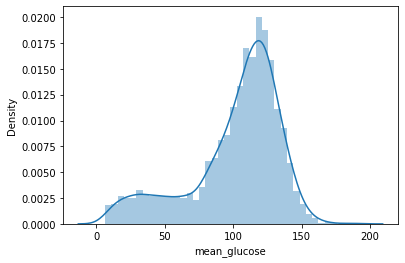

In [43]:
sns.distplot(medical_info_dataset[(medical_info_dataset['mean_glucose'] > 0) & (medical_info_dataset['mean_glucose'] < 300)].mean_glucose)

In [44]:
# names in personal_data and unique_names_dataset are equal on equal positions
personal_data['name'].isin(unique_names_dataset['name']).value_counts()

True    3933
Name: name, dtype: int64

In [45]:
# merge datasets to create single large dataset with usefull data so it's easier to create graphs and analysis
merged_medical_info_dataset = unique_names_dataset.merge(medical_info_dataset, on=['name'], how='outer').drop('medical_info', axis='columns')
usefull_dataset = personal_data.merge(merged_medical_info_dataset, on=['name', 'address'], how='outer')
usefull_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   address           3933 non-null   object 
 2   age               3933 non-null   int64  
 3   sex               3933 non-null   object 
 4   date_of_birth     3933 non-null   object 
 5   kurtosis_oxygen   3929 non-null   float64
 6   occupation        3924 non-null   object 
 7   marital-status    3923 non-null   object 
 8   pregnant          3930 non-null   object 
 9   education-num     3533 non-null   float64
 10  relationship      3925 non-null   object 
 11  std_oxygen        3924 non-null   float64
 12  capital-gain      3926 non-null   float64
 13  skewness_oxygen   3925 non-null   float64
 14  education         3926 non-null   object 
 15  fnlwgt            3928 non-null   float64
 16  class             3924 non-null   float64


### Distribúcia veku podľa pohlavia

In [46]:
# create two subsets for records of Male and Female age
male_age = usefull_dataset[(usefull_dataset['sex'] == " Male") & (usefull_dataset['age'] > 0)]
female_age = usefull_dataset[(usefull_dataset['sex'] == " Female") & (usefull_dataset['age'] > 0)]

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,1336.0,51.961078,11.842726,3.0,45.0,53.0,60.0,87.0
Male,2596.0,51.763097,11.758772,9.0,44.0,52.0,59.0,113.0


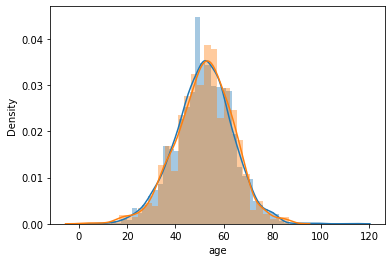

In [47]:
# compare distribution of age of male and female dataset
sns.distplot(male_age['age'])
sns.distplot(female_age['age'])
usefull_dataset[usefull_dataset['age'] > 0].groupby(['sex'])['age'].describe()

In [48]:
# test whether male and female datasets are from distributions of equal variances
age_sex_levene_test = stats.levene(male_age['age'], female_age['age'])
print(age_sex_levene_test)

# interpret
alpha = 0.05
if age_sex_levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

LeveneResult(statistic=0.029279739690445113, pvalue=0.8641435373024612)
Equal variances (fail to reject H0)


In [49]:
# test whether male and female datasets are from equal distributions
age_sex_student_ttest, p = stats.ttest_ind(male_age['age'], female_age['age'])
print('Statistics=%.3f, p=%.3f' % (age_sex_student_ttest, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-0.499, p=0.618
Same distributions (fail to reject H0)


### Ditribúcia týždenných hodín podľa pohlavia

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,1333.0,36.278320,11.920965,1.0,30.0,40.0,40.0,99.0
Male,2596.0,42.392912,11.874800,2.0,40.0,40.0,48.0,99.0


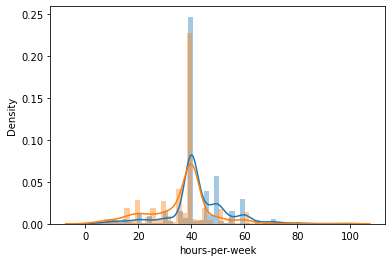

In [50]:
female_hours = usefull_dataset[(usefull_dataset['sex'] == " Female") & (usefull_dataset['hours-per-week'] > 0)]
male_hours = usefull_dataset[(usefull_dataset['sex'] == " Male") & (usefull_dataset['hours-per-week'] > 0)]
sns.distplot(male_hours['hours-per-week'])
sns.distplot(female_hours['hours-per-week'])
usefull_dataset[usefull_dataset['hours-per-week'] > 0].groupby(['sex'])['hours-per-week'].describe()

In [51]:
# test whether male and female datasets are from distributions of equal variances
hours_sex_levene_test = stats.levene(male_hours['hours-per-week'], female_hours['hours-per-week'])
print(hours_sex_levene_test)

# interpret
alpha = 0.05
if hours_sex_levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

LeveneResult(statistic=2.112112571040764, pvalue=0.1462173564857972)
Equal variances (fail to reject H0)


In [52]:
# test whether male and female datasets are from equal distributions
hours_sex_student_ttest, p = stats.ttest_ind(male_hours['hours-per-week'], female_age['hours-per-week'])
print('Statistics=%.3f, p=%.3f' % (hours_sex_student_ttest, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=nan, p=nan
Different distributions (reject H0)


## Identifikácia problémov s dátami v datasetoch

Medzi problemy s nevhodnou strukturou dat by som radil adresu ktora je cela ulozena ako string. Tieto data mohly byt ulozene ako json a dalo by sa s nimi lahsie pracovat. Napriklad keby chceme graf o udajoch podla statu musime si ich najpv vybrat zo stringu.

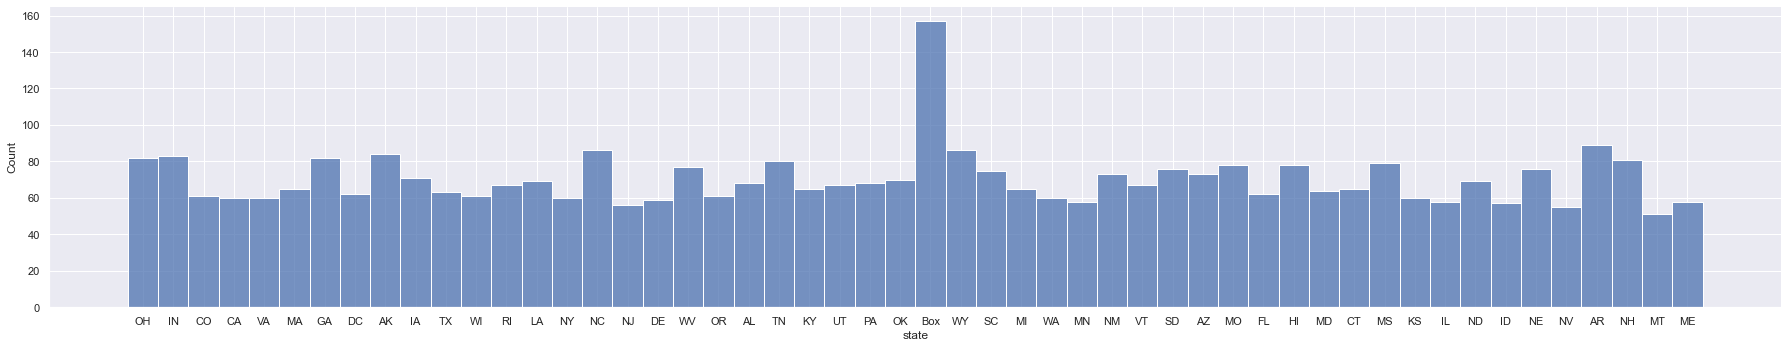

In [53]:
column_one = personal_data['address'].str.split(', ',expand=True)[0]
column_two_and_three = personal_data['address'].str.split(', ',expand=True)[1]
column_two = column_two_and_three.str.split(' ',expand=True)[0]
column_three = column_two_and_three.str.split(' ',expand=True)[1]

personal_data['address'] = column_one
personal_data['state'] = column_two
personal_data['postal_code'] = column_three

sns.set_theme(style="darkgrid")
sns.displot(data=personal_data['state'].dropna(),aspect = 5)

dalsi problem s datami je ze medzi personal_data sa nachadzaju neplatne data ako napriklad osoba ktora ma -1 rokov

In [54]:
personal_data.age.min()

-1

Problem je aj s nekonzistenciov formatovania datumov kde hned prvy je inak formatovany ako ostatne
a to nehovoriac o tom ze kolonka vek nekoresponduje s datumom narodenia. jedine ze by tam boli aj datumy z historie ako napriklad rok narodenia 55

In [55]:
personal_data[["date_of_birth","age"]]

,date_of_birth,age
0,18/01/1961,58
1,1962-11-08,56
2,1967-04-18,52
3,55-09-04,64
4,1952-12-05,66
...,...,...
3928,1974-04-16,45
3929,1971-10-18,48
3930,36-04-15,83
3931,1970-05-06,49


Pri Medical_data su problemy s datamy trosku ine napriklad ma nulove hodnoty kde vsetky zaznamy su len z mien a adries inak kazda kategoria ma nejake null hodnoty

In [56]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3983 non-null   object 
 1   address          3983 non-null   object 
 2   kurtosis_oxygen  3973 non-null   float64
 3   occupation       3963 non-null   object 
 4   marital-status   3967 non-null   object 
 5   pregnant         3973 non-null   object 
 6   education-num    3572 non-null   float64
 7   relationship     3970 non-null   object 
 8   std_oxygen       3966 non-null   float64
 9   capital-gain     3970 non-null   float64
 10  skewness_oxygen  3963 non-null   float64
 11  education        3963 non-null   object 
 12  fnlwgt           3974 non-null   float64
 13  class            3966 non-null   float64
 14  income           3966 non-null   object 
 15  medical_info     3970 non-null   object 
 16  native-country   3973 non-null   object 
 17  capital-loss  

Dalsi problem s other_data je ze data pre medical info sa tvaria ze su JSON ale niesu koli tomu ze pouzivaju jednoite uvodzovky 

In [57]:
other_data.medical_info[0]

"{'mean_glucose':'117.4375','std_glucose':'47.61068518','kurtosis_glucose':'0.149848307','skewness_glucose':'0.148917285'}"

takysto ako pri personal data tak aj pri other_data sa v datach nachadzaju nezmysli ako napriklad ze musi su tehotny

In [58]:
other_data[other_data['pregnant'] == "t"]

,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,capital-gain,...,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
6,Gary Anderson,"80176 Karen Locks\r\nSherryland, NC 20857",8.859609,Adm-clerical,Never-married,t,9.0,Own-child,17.925133,0.0,...,185452.0,0.0,<=50K,"{'mean_glucose':'109.4765625','std_glucose':'4...",United-States,0.0,2.304348,40.0,White,Private
67,Ernest Wallin,"08888 Michael Hill\r\nJustinport, MO 39902",6.289634,Tech-support,Never-married,t,NaN,Not-in-family,19.149346,0.0,...,34173.0,0.0,<=50K,"{'mean_glucose':'140.515625','std_glucose':'47...",United-States,0.0,3.772575,40.0,White,Private
142,Kenneth Weatherholt,6644 Marshall Mountains Suite 928\r\nWest Susa...,2.144711,Exec-managerial,Never-married,t,14.0,NaN,NaN,NaN,...,170230.0,1.0,>50K,"{'mean_glucose':'76.96875','std_glucose':'41.4...",United-States,0.0,NaN,60.0,NaN,NaN
161,Neal Hills,"682 Jimenez Coves\r\nJoseborough, SD 48776",12.608811,Adm_clerical,Widowed,t,10.0,Not-in-family,14.083288,0.0,...,74784.0,0.0,<=50K,"{'mean_glucose':'121.421875','std_glucose':'55...",United-States,0.0,1.579431,40.0,White,Local-gov
211,Cody Brown,USNV Chapman\r\nFPO AP 06085,14.323632,Prof-specialty,Married-civ-spouse,t,10.0,Wife,10.896719,0.0,...,187728.0,0.0,>50K,"{'mean_glucose':'92.953125','std_glucose':'46....",United-States,1887.0,1.300167,50.0,White,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,Roy Tuner,"72977 James Gateway Apt. 966\r\nTylerport, NC ...",4.036193,Prof-specialty,Married-civ-spouse,t,14.0,Wife,43.422295,0.0,...,159782.0,1.0,>50K,"{'mean_glucose':'62.765625','std_glucose':'33....",United-States,0.0,10.989130,45.0,White,State-gov
3816,Anthony Foster,"4337 Aaron Gardens Apt. 359\r\nPaulbury, CO 90029",13.981809,?,Married-civ-spouse,t,13.0,Husband,14.557123,0.0,...,208311.0,0.0,>50K,"{'mean_glucose':'125.3984375','std_glucose':'5...",United-States,0.0,1.128763,80.0,White,?
3847,Frank Basel,"948 Kyle Stravenue\r\nWest Ryan, ID 51923",3.274483,Other-service,Separated,t,10.0,Not-in-family,40.525963,0.0,...,280422.0,0.0,<=50K,"{'mean_glucose':'119.078125','std_glucose':'47...",Peru,0.0,12.497492,25.0,White,Private
3876,Louis Perrien,"02294 Debra Common Suite 037\r\nWest Raymond, ...",0.204406,Prof-specialty,Never-married,t,13.0,Own-child,72.147916,0.0,...,121144.0,1.0,<=50K,"{'mean_glucose':'8.109375','std_glucose':'33.7...",United-States,0.0,111.352007,18.0,Black,Local-gov


medzi dalsie problemy datasetu other_data radim nazvy atributov ktore casto nemaju ziadny vyznam alebo je nedostacujuci na pochopenie o com hovori

celkovo v other_data sa nachadza vela Null hodnot ktore budeme naskor riesit tak ze patricny riadok budeme ignorovat s pouzitim Pairwise deletion toto budeme pouzivat aj pri neplatnych datach ktore boli opisovane vyssie